# Japan Hostel Exploratory Data Analysis

I came across this library called foliumn that allows for easy data visualization in Python over an interactive map. I wanted to experiment with this tool. I came across this data set on Kaggled called [Japan Hostel Dataset](https://www.kaggle.com/koki25ando/hostel-world-dataset). I think it would be fun to experiement with Folium and do some basic exploratory data analysis on this Japanese Hostel dataset because I will be going to Japan very soon and would like to see where most of the hostels in major Japanese cities.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins


%matplotlib inline

In [2]:
#reading in the data
japan_data = pd.read_csv('Hostel.csv')

In [3]:
#column and row count
japan_data.shape

(342, 16)

In [4]:
#first five results
japan_data.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [5]:
#last five results
japan_data.tail()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
337,338,YADOYA Guesthouse Green,Tokyo,2300,2.6km from city centre,8.2,Fabulous,7.9,7.7,6.9,8.9,8.9,8.8,8.3,139.668125,35.702908
338,339,YADOYA Guesthouse Orange,Tokyo,2000,2.9km from city centre,8.9,Fabulous,8.6,9.0,7.8,9.4,9.0,9.2,9.4,139.667695,35.706513
339,340,YAWP! backpackers,Tokyo,2500,17.5km from city centre,9.3,Superb,9.5,9.3,9.4,8.5,9.5,9.2,9.6,139.869197,35.752885
340,341,You En Me House,Kyoto,2800,2.4km from city centre,8.0,Fabulous,7.3,8.0,6.7,8.0,8.7,10.0,7.3,135.749063,34.997376
341,342,Zabutton Hostel,Tokyo,2900,5.9km from city centre,8.6,Fabulous,8.1,8.5,7.8,9.0,8.9,9.5,8.5,139.742116,35.655470


In [6]:
#basic statistical info of dataframe
japan_data.describe()

,Unnamed: 0,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
count,342.000000,3.420000e+02,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,298.000000,298.000000
mean,171.500000,8.388012e+03,8.782569,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,136.756376,34.976583
std,98.871128,7.641527e+04,0.960909,1.382002,1.215775,1.285356,1.102703,1.114345,1.086513,1.047809,3.251995,2.040896
min,1.000000,1.000000e+03,3.100000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,103.873135,1.310820
25%,86.250000,2.000000e+03,8.600000,7.800000,8.800000,8.000000,8.000000,8.700000,9.000000,8.600000,135.505314,34.668900
50%,171.500000,2.500000e+03,9.000000,8.600000,9.300000,9.000000,9.000000,9.200000,9.400000,9.000000,135.761617,34.998471
75%,256.750000,2.900000e+03,9.400000,9.000000,9.800000,9.300000,9.400000,9.600000,9.800000,9.500000,139.770187,35.696709
max,342.000000,1.003200e+06,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,139.877880,36.204824


In [7]:
#basic information of dataframe
japan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 16 columns):
Unnamed: 0       342 non-null int64
hostel.name      342 non-null object
City             342 non-null object
price.from       342 non-null int64
Distance         342 non-null object
summary.score    327 non-null float64
rating.band      327 non-null object
atmosphere       327 non-null float64
cleanliness      327 non-null float64
facilities       327 non-null float64
location.y       327 non-null float64
security         327 non-null float64
staff            327 non-null float64
valueformoney    327 non-null float64
lon              298 non-null float64
lat              298 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 42.9+ KB


In [8]:
#number of nulls
japan_data.isnull().sum()

Unnamed: 0        0
hostel.name       0
City              0
price.from        0
Distance          0
summary.score    15
rating.band      15
atmosphere       15
cleanliness      15
facilities       15
location.y       15
security         15
staff            15
valueformoney    15
lon              44
lat              44
dtype: int64

In [9]:
#list of columns with nulls
null_columns = ['summary.score', 'rating.band', 'atmosphere', 'cleanliness', 'facilities', 'location.y', 'security', 'staff', 'valueformoney']

#filling nulls with the mean
japan_data[null_columns] = japan_data[null_columns].fillna(japan_data[null_columns].mean())

In [10]:
#percentage of nulls
japan_data.isnull().sum() / japan_data.shape[0]

Unnamed: 0       0.000000
hostel.name      0.000000
City             0.000000
price.from       0.000000
Distance         0.000000
summary.score    0.000000
rating.band      0.043860
atmosphere       0.000000
cleanliness      0.000000
facilities       0.000000
location.y       0.000000
security         0.000000
staff            0.000000
valueformoney    0.000000
lon              0.128655
lat              0.128655
dtype: float64

In [11]:
#value count of cities
japan_data.City.value_counts()

Tokyo           127
Osaka           104
Kyoto            78
Fukuoka-City     19
Hiroshima        14
Name: City, dtype: int64

In [12]:
#converting cities to lower case
japan_data.City = japan_data.City.str.lower()

In [13]:
#value count of cities
japan_data.City.value_counts()

tokyo           127
osaka           104
kyoto            78
fukuoka-city     19
hiroshima        14
Name: City, dtype: int64

In [14]:
#value count of distance
japan_data.Distance.value_counts()

1.9km from city centre     10
4.5km from city centre      8
6.5km from city centre      8
1.4km from city centre      7
2.4km from city centre      7
                           ..
3km from city centre        1
26.6km from city centre     1
20.3km from city centre     1
18.5km from city centre     1
36.6km from city centre     1
Name: Distance, Length: 119, dtype: int64

In [15]:
#removing alpha texts from distance column
japan_data.Distance = japan_data.Distance.str.replace('[a-zA-Z]', '').str.strip()

In [16]:
japan_data.Distance = japan_data.Distance.astype(dtype = 'float')

In [17]:
#value count of ratings
japan_data['rating.band'].value_counts(dropna = False)

Superb       182
Fabulous     106
Very Good     20
NaN           15
Good          11
Rating         8
Name: rating.band, dtype: int64

In [18]:
#dataframe filtered by nulls
japan_data[pd.isnull(japan_data).any(axis = 1)]

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
1,2,& And Hostel,fukuoka-city,2600,0.7,9.500000,Superb,9.400000,9.700000,9.500000,9.700000,9.200000,9.700000,9.500000,NaN,NaN
7,8,36Hostel,hiroshima,2000,1.6,9.500000,Superb,8.800000,9.900000,9.200000,9.600000,9.800000,9.800000,9.500000,NaN,NaN
8,9,3Q House - Asakusa Smile,tokyo,2500,10.2,8.782569,NaN,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,NaN,NaN
30,31,Bed Stock,fukuoka-city,2500,1.1,8.900000,Fabulous,8.600000,9.900000,8.100000,9.400000,8.900000,9.000000,8.600000,NaN,NaN
34,35,bnb+ Ninja Dojo Ueno,tokyo,2500,8.0,5.200000,Rating,4.000000,3.300000,4.000000,8.700000,5.300000,4.700000,6.700000,NaN,NaN
35,36,bnb+Shinjuku Castle,tokyo,2500,1.3,5.000000,Rating,2.700000,4.000000,3.300000,7.300000,5.300000,5.300000,6.700000,NaN,NaN
37,38,Bonsai Guest House,osaka,1800,5.9,8.700000,Fabulous,7.500000,9.100000,8.400000,9.500000,8.900000,8.900000,8.800000,NaN,NaN
43,44,Calendar Hotel,kyoto,3500,8.8,8.782569,NaN,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,NaN,NaN
44,45,Capsule Hotel Anshin Oyado Akihabara,tokyo,6200,0.0,8.782569,NaN,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,NaN,NaN
45,46,Capsule Hotel Anshin Oyado Shinbashi,tokyo,6000,6.6,8.782569,NaN,8.238838,9.011927,8.597554,8.694801,8.947401,9.133333,8.848318,NaN,NaN


In [19]:
#filling null values
japan_data['rating.band'].fillna('Fabulous', inplace = True)

In [20]:
#value count of ratings
japan_data['rating.band'].value_counts(dropna = False)

Superb       182
Fabulous     121
Very Good     20
Good          11
Rating         8
Name: rating.band, dtype: int64

In [21]:
#cleaning no rating values
japan_data['rating.band'] = japan_data['rating.band'].str.replace('Rating', 'No Rating')

In [22]:
japan_data['rating.band'].value_counts(dropna = False)

Superb       182
Fabulous     121
Very Good     20
Good          11
No Rating      8
Name: rating.band, dtype: int64

In [23]:
#dropping columns
japan_data = japan_data.drop(columns = 'Unnamed: 0')

In [24]:
#all dataframe columns
japan_data.columns

Index(['hostel.name', 'City', 'price.from', 'Distance', 'summary.score',
       'rating.band', 'atmosphere', 'cleanliness', 'facilities', 'location.y',
       'security', 'staff', 'valueformoney', 'lon', 'lat'],
      dtype='object')

In [25]:
#renaming columns
japan_data = japan_data.rename(columns = {'hostel.name': 'name',
                                          'price.from' : 'price', 
                                          'City': 'city',
                                          'Distance' : 'km_from_center', 
                                          'summary.score' : 'overall_score', 
                                          'rating.band': 'rating',
                                          'location.y' : 'location',
                                          'valueformoney' : 'value'})

In [26]:
#all dataframe columns
japan_data.columns

Index(['name', 'city', 'price', 'km_from_center', 'overall_score', 'rating',
       'atmosphere', 'cleanliness', 'facilities', 'location', 'security',
       'staff', 'value', 'lon', 'lat'],
      dtype='object')

In [27]:
#column and row count
japan_data.shape

(342, 15)

In [28]:
#first five results
japan_data.head()

,name,city,price,km_from_center,overall_score,rating,atmosphere,cleanliness,facilities,location,security,staff,value,lon,lat
0,"""Bike & Bed"" CharinCo Hostel",osaka,3300,2.9,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,& And Hostel,fukuoka-city,2600,0.7,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,&And Hostel Akihabara,tokyo,3600,7.8,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,&And Hostel Ueno,tokyo,2600,8.7,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,&And Hostel-Asakusa North-,tokyo,1500,10.5,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


## Exploratory Data Analysis

### Number of Hostels in each City

- Most hostels are in the 3 largest cities. Tokyo, Osaka, and Kyoto
- Fukuoka and Hiroshima is not as popular as the first three so it makes sense why there isn't as much hostel

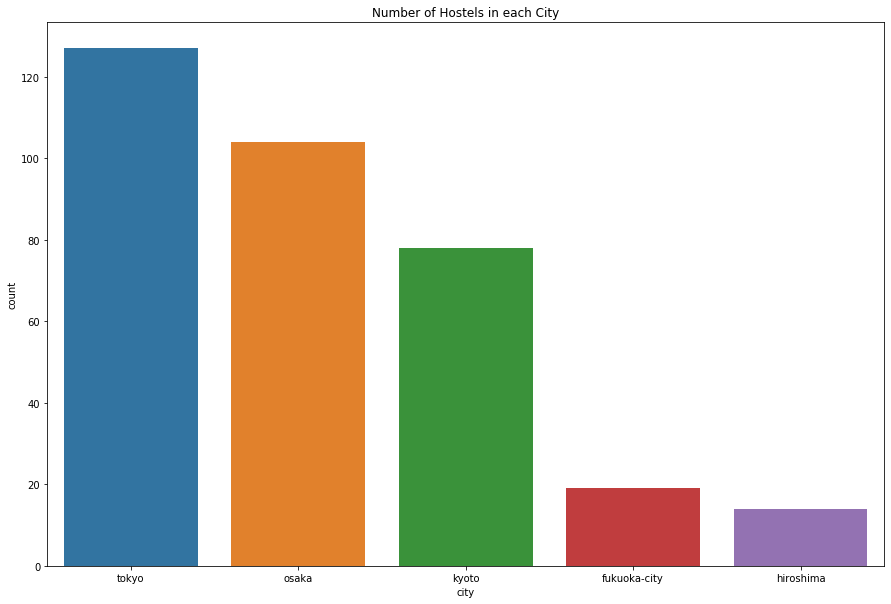

In [29]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#distribution of price
ax = sns.countplot(japan_data['city'], order = japan_data['city'].value_counts().index).set_title('Number of Hostels in each City')

### Price Distribution

- The first price distribution is is heavily skewed by some outliers so I will want to adjust the distribution to sort out the outliers.
- The second price distribution is left skewed with most of the pricing following between 1,500 yen 3,500 yen.

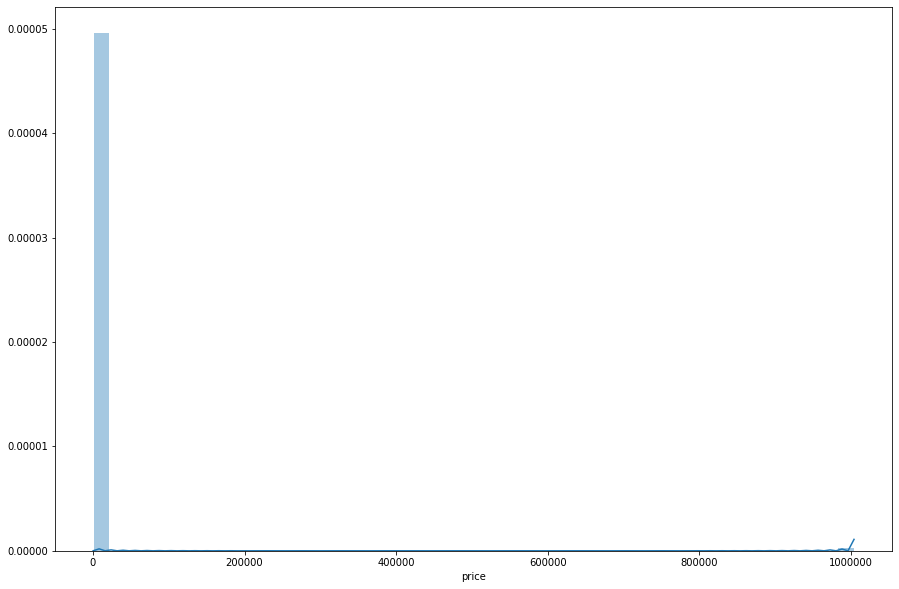

In [30]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#distribution of price
ax = sns.distplot(japan_data['price'])

In [31]:
#filtering out outliers
japan_data = japan_data[(japan_data['price'] < japan_data['price'].quantile(.995)) & (japan_data['price'] > japan_data['price'].quantile(.005))]

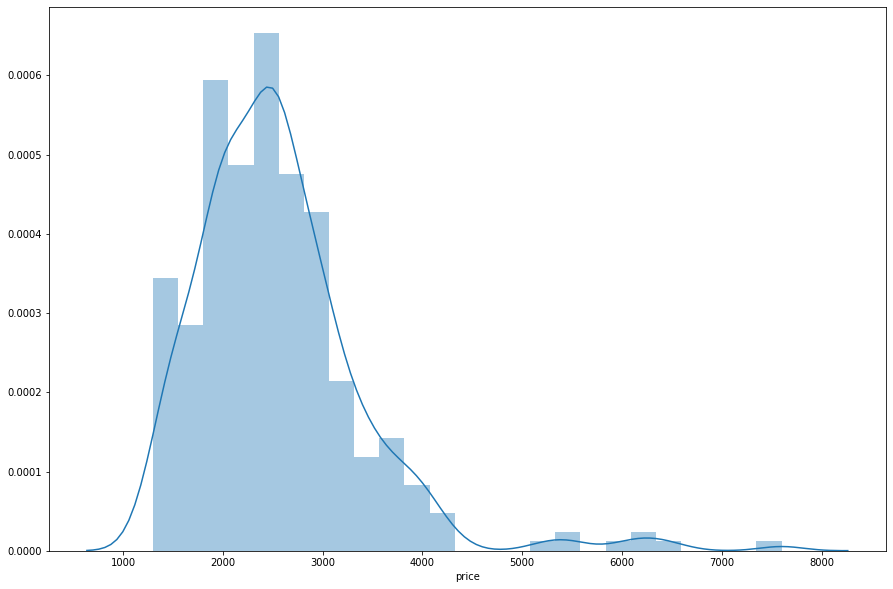

In [32]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#distribution of price
ax = sns.distplot(japan_data['price'])

### Price by Location

- There is no clear indication on if the city has an effect on the price. 
- Most hostel prices are around the same regardless of the location, but there is a lot of variance in each boxplot so having more data would have helped out in determining if a city plays a role in the price of the hostel.

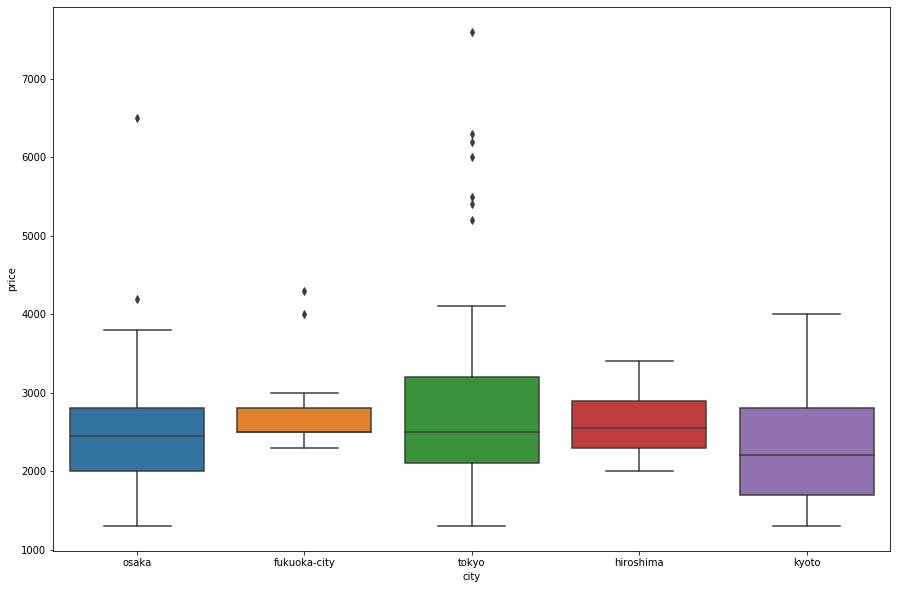

In [33]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#boxplot of price by city
ax = sns.boxplot(x = 'city', y = 'price', data = japan_data)

### Price by Rating

- There is no clear indication that rating has in effedt on the price of the hostel.
- Most hostel prices seem to be in similar range regardless of the range category.
- There are some outliers in the Superb and Fabulous category.
- More data would help in determining if the rating does have an effect on the price of the hostel.

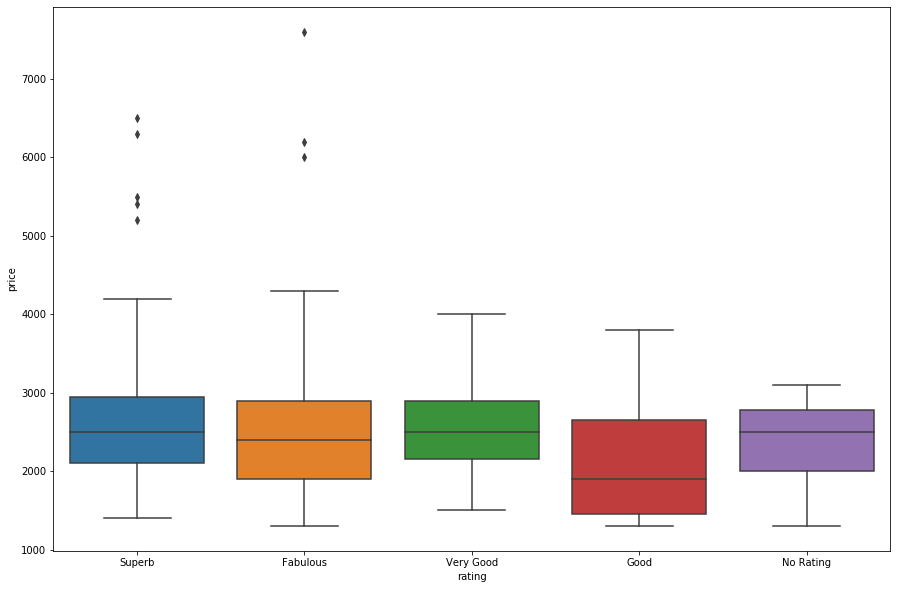

In [34]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#boxplot of price by rating
ax = sns.boxplot(x = 'rating', y = 'price', data = japan_data, order = ['Superb', 'Fabulous', 'Very Good', 'Good', 'No Rating'])

### Price by Distance from Center

- There is not a strong relationship between the price and the distance from the center of the city.
- Most hostels are within 10 km from the center of the city and within the same price range.

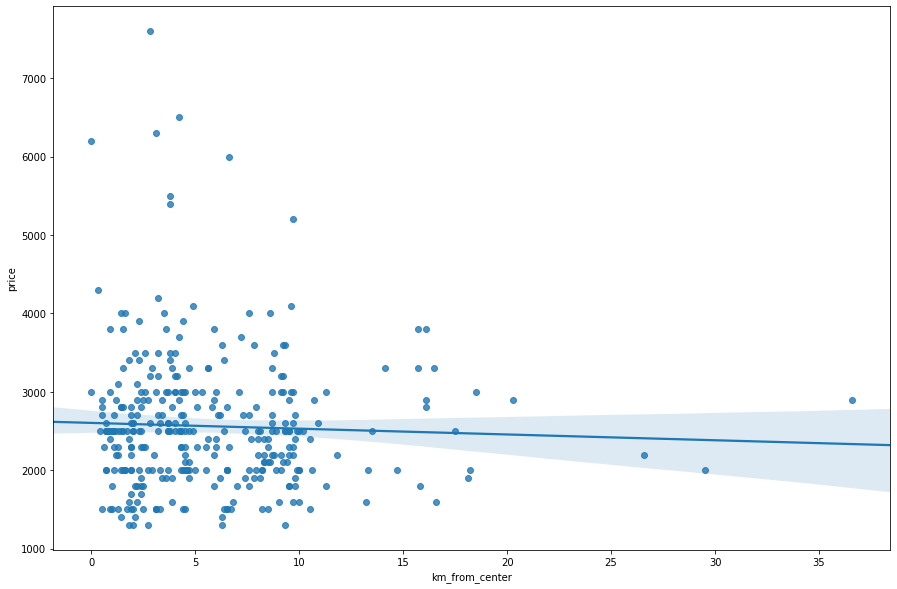

In [35]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#regplot of price by distance
ax = sns.regplot(x = 'km_from_center', y = 'price', data = japan_data)

### Price by Overall Score

- There is a positive, but weak relationship between the price and the overall score of the hostel.
- Most of the hostels are within the same score and price range.

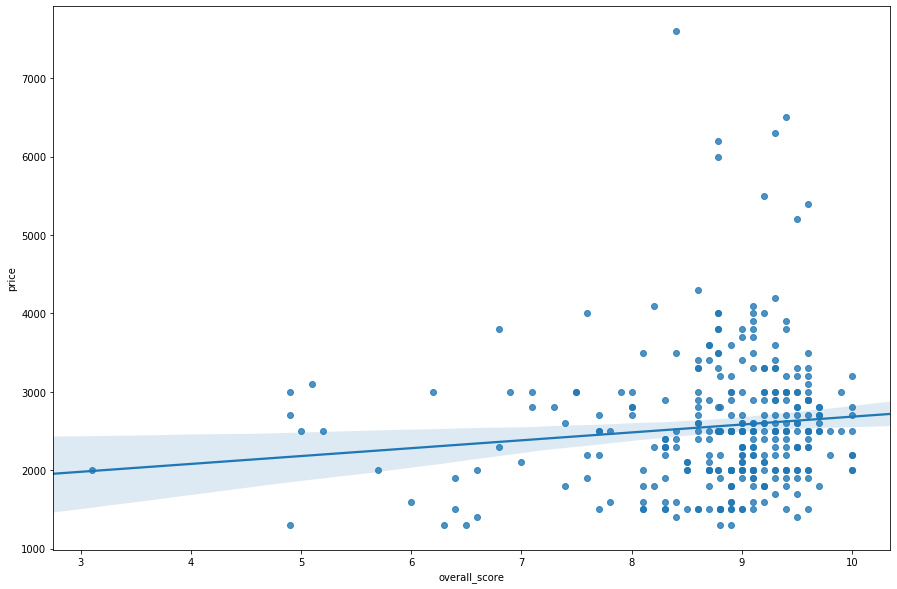

In [36]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#regplot of price by distance
ax = sns.regplot(x = 'overall_score', y = 'price', data = japan_data)

### Overall Score by Rating

- The relationship between the overall score and rating is obvious. The higher the overall score means the higher rating category.

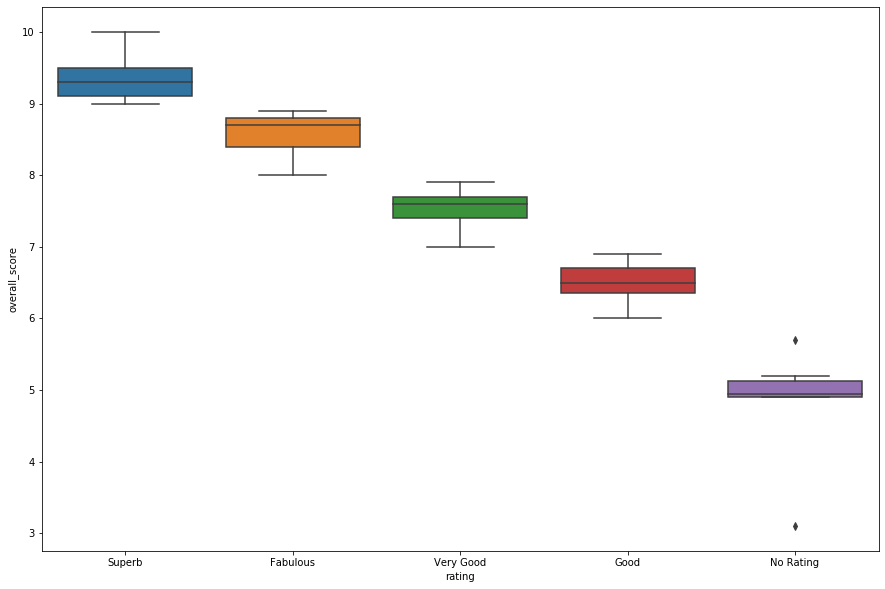

In [37]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#boxplot of price by rating
ax = sns.boxplot(x = 'rating', y = 'overall_score', data = japan_data, order = ['Superb', 'Fabulous', 'Very Good', 'Good', 'No Rating'])

### Overall Score by City

- There is no clear indication that the city plays a role of the overall score of the hostel.
- There are a few outliers in Osaka, Tokyo, and Kyoto.

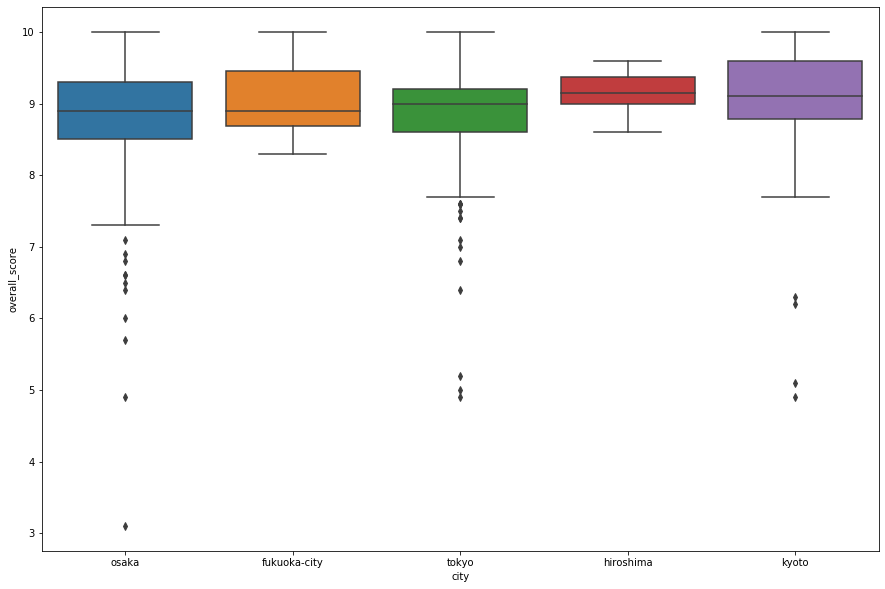

In [38]:
#setting plot figure size
plt.figure(figsize= (15, 10))
#boxplot of overall score by city
ax = sns.boxplot(x = 'city', y = 'overall_score', data = japan_data)

### Correlation Heatmap

- There is a strong correlation between the individual category scores and the overall scores. Which makes sense since the overall score is a culmination of all the individual scores.

In [39]:
#getting dummies for city column
city_dummies = pd.get_dummies(japan_data['city'])

#getting dummies for rating column
rating_dummies = pd.get_dummies(japan_data['rating'])

In [40]:
japan_data = pd.concat([japan_data, city_dummies, rating_dummies], axis = 1)

Text(0.5, 1, 'Japan Data Correlation Heatmap')

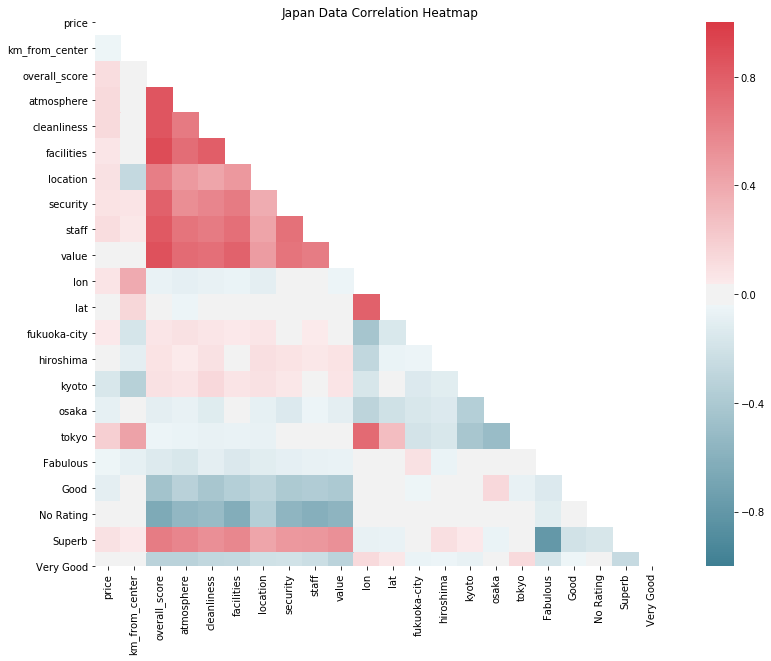

In [41]:
#calculating correlation values
corr = japan_data.corr()

#setting plot figure size
plt.figure(figsize = (15, 10))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1,vmin = -1, center = 0, square=True).set_title('Japan Data Correlation Heatmap')

### Hostel Locations

### Fukuoka

In [42]:
#filter dataframe by fukuoka
fukuoka = japan_data[japan_data['city'] == 'fukuoka-city'].dropna()

In [43]:
#setting map to fukuoka
map_1 = folium.Map(location = [33.5902,130.4017] ,zoom_start=11)

#creating marker cluster
map_1_rooms_map = plugins.MarkerCluster().add_to(map_1)

#looping through each hostel coordinates
for lat,lon,label in zip(fukuoka.lat, fukuoka.lon, fukuoka.name):
    folium.Marker(location = [lat, lon], icon=folium.Icon(icon='home'), popup=label).add_to(map_1_rooms_map)
map_1.add_child(map_1_rooms_map)

#show map
display(map_1)

### Hiroshima

In [44]:
#filter dataframe by hiroshmia
hiroshima = japan_data[japan_data['city'] == 'hiroshima'].dropna()

In [45]:
#setting map to hiroshima
map_2 = folium.Map(location = [34.3853, 132.4553], zoom_start=11)

#setting marker cluster
map_2_rooms_map = plugins.MarkerCluster().add_to(map_2)

#looping through each hostel coordinates
for lat,lon,label in zip(hiroshima.lat, hiroshima.lon, hiroshima.name):
    folium.Marker(location = [lat, lon],icon=folium.Icon(icon='home'),popup=label).add_to(map_2_rooms_map)
map_2.add_child(map_2_rooms_map)

#show map
display(map_2)

### Osaka

In [46]:
#filter dataframe by osaka
osaka = japan_data[japan_data['city'] == 'osaka'].dropna()

In [47]:
#setting map to osaka
map_3 = folium.Map(location = [34.6037, 135.5023], zoom_start = 10)

#setting marker cluster
map_3_rooms_map = plugins.MarkerCluster().add_to(map_3)

#looping through each hostel coordinates
for lat,lon,label in zip(osaka.lat, osaka.lon, osaka.name):
    folium.Marker(location = [lat, lon],icon=folium.Icon(icon='home'),popup=label).add_to(map_3_rooms_map)
map_3.add_child(map_3_rooms_map)

#show map
display(map_3)

### Kyoto

In [48]:
#filtering dataframe by kyoto
kyoto = japan_data[japan_data['city'] == 'kyoto'].dropna()

In [49]:
#setting map to kyoto
map_4 = folium.Map(location = [35.0116, 135.7681], zoom_start = 11)

#setting marker cluster
map_4_rooms_map = plugins.MarkerCluster().add_to(map_4)

#looping through each hostel coordinates
for lat,lon,label in zip(kyoto.lat, kyoto.lon, kyoto.name):
    folium.Marker(location = [lat, lon],icon=folium.Icon(icon='home'),popup=label).add_to(map_4_rooms_map)
map_4.add_child(map_4_rooms_map)

#show map
display(map_4)

### Tokyo

In [50]:
#filtering dateframe by tokyo
tokyo = japan_data[japan_data['city'] == 'tokyo'].dropna()

In [51]:
#setting map to tokyo
map_5 = folium.Map(location = [35.6762, 139.6503], zoom_start = 11)

#setting marker cluster
map_5_rooms_map = plugins.MarkerCluster().add_to(map_5)

#looping through each hostel coordinates
for lat,lon,label in zip(tokyo.lat, tokyo.lon, tokyo.name):
    folium.Marker(location = [lat, lon],icon=folium.Icon(icon='home'),popup=label).add_to(map_5_rooms_map)
map_5.add_child(map_5_rooms_map)

#show map
display(map_5)

## Conclusion

Looking at the data it looks like it would be a good idea for me to not count out hostels as an option for my upcoming trip. Most of the hostel offerings are priced similarly and competitively. Also most of the hostels are relatively close to the center of the city. 

For future iterations:
- Scrape more data from hostelworld.
- Compile additional data from other offerings such as hotels.